# Taylor Series

1> Exponential Function: f(x) = exp(x)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math
def expTaylor(x, x0, nmax):
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    t = 0
    t = t + np.exp(x0) * (x-x0)**nmax / math.factorial(nmax)
    return t
expTaylor(1, 0, 10)

np.float64(2.755731922398589e-07)

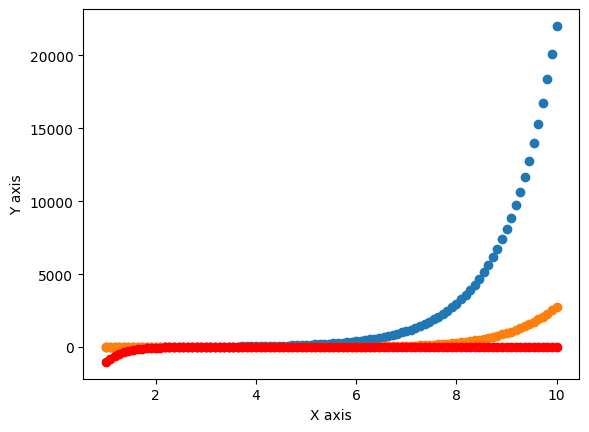

In [34]:
plt.xlabel("X axis")
plt.ylabel("Y axis")

x_list = np.linspace(1,10, 100)
plt.scatter(x_list, np.exp(x_list))
plt.scatter(x_list, expTaylor(x_list, 0, 10))
plt.scatter(x_list, expTaylor(x_list, 10, 25), c='red')

2> Sine function: f(x) = sin(x) at x0 = 0

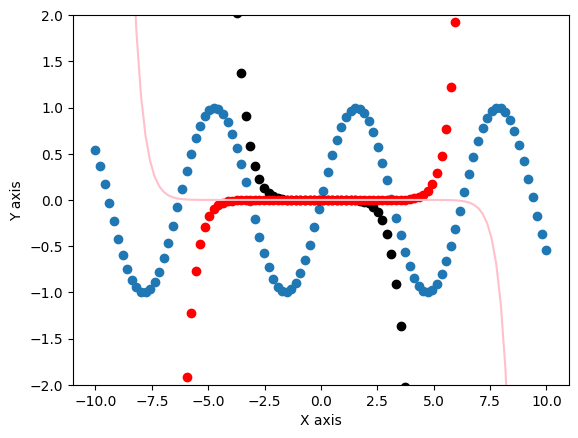

In [35]:
def sinTaylor(x, n):
    t = 0
    t = t + ((-1)**n * x**(2*n+1))/ math.factorial(2*n+1)
    return t
sinTaylor(12, 10)

plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.ylim([-2,2])

x_list = np.linspace(-10,10, 100)
plt.scatter(x_list, np.sin(x_list))

plt.scatter(x_list, sinTaylor(x_list, 3), c = 'black')
plt.scatter(x_list, sinTaylor(x_list, 6), c='red')
plt.plot(x_list, sinTaylor(x_list, 9), c='pink')

## Implementation of a general function

1> Derivative. f'(x) = lim(h->0) (f(x+h)-f(x))/h

In [36]:
def Derivative(f, x, h):
    # f: Function
    # x: Argument of f
    # h: step-size
    return (f(x+h)-f(x))/h

In [37]:
def func(x):
    return 2*np.sin(x)**2 + x


print(Derivative (func, 10.5, 0.1))

2.5529969724111723


2> Higher Derivatives

In [38]:
def nDerivative(f, x, h, n):
    # f: Function
    # x: Argument of f
    # h: step-size
    # n: nth Derivative
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * math.factorial(n)/ (math.factorial(k)* math.factorial(n-k)) * f(x + k*h)
    return t / h**n
print(nDerivative (func, 10.5, 0.1, 0))

12.04772926022427


## Taylor Expansion of a General function

In [39]:
def Taylor(f, x, x0, nmax, h):
    # f: Function
    # x: Argument around f
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    # h: stepsize
    t = 0
    t = t + nDerivative(f, x0, nmax, h) * (x-x0)**nmax / math.factorial(nmax)
    return t

print(Taylor(func, 10, 0, 10, 10))



5.525382452796781e-07


# Interpolation

### Generate Data Points

In [40]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

npoints = 21
x_list = np.linspace(-5, 5, npoints)
data0 = np.array([x_list, correctFunction(x_list)])

In [41]:
data0

array([[ -5.     ,  -4.5    ,  -4.     ,  -3.5    ,  -3.     ,  -2.5    ,
         -2.     ,  -1.5    ,  -1.     ,  -0.5    ,   0.     ,   0.5    ,
          1.     ,   1.5    ,   2.     ,   2.5    ,   3.     ,   3.5    ,
          4.     ,   4.5    ,   5.     ],
       [ 34.25   ,  25.96875,  19.8    ,  15.48125,  12.75   ,  11.34375,
         11.     ,  11.45625,  12.45   ,  13.71875,  15.     ,  16.03125,
         16.55   ,  16.29375,  15.     ,  12.40625,   8.25   ,   2.26875,
         -5.8    , -16.21875, -29.25   ]])

In [42]:
data0[0]

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

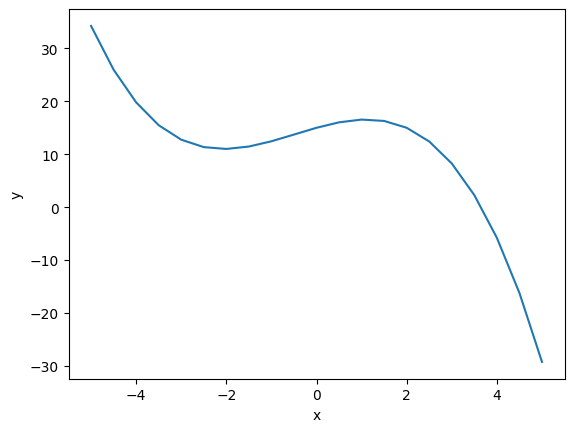

In [43]:
plt.xlabel('x')
plt. ylabel('y')

plt.plot(data0[0], data0[1])

Modifying x and y values but adding random points

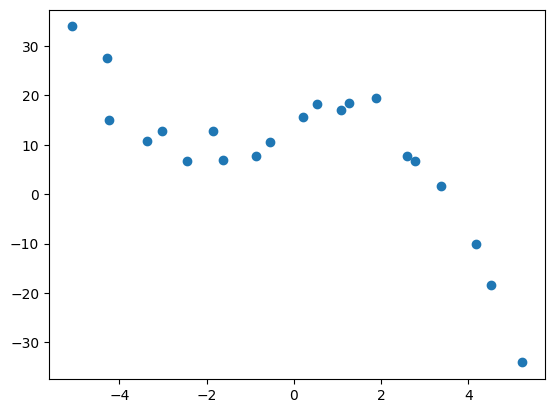

In [44]:
data = np.array([data0[0] + 0.25 * (2*np.random.rand(npoints)-1), data0[1] + 5.0 * (2*np.random.rand(npoints)-1)])
# plt.plot(data0[0], data0[1]): The function we created
plt.scatter(data[0], data[1])

We need to find a good fit on the above data

## Spline Interpolation

### Unpertubed Data

In [45]:
from scipy import interpolate

Linear Spline: The Derivatives are usually very discontinuous

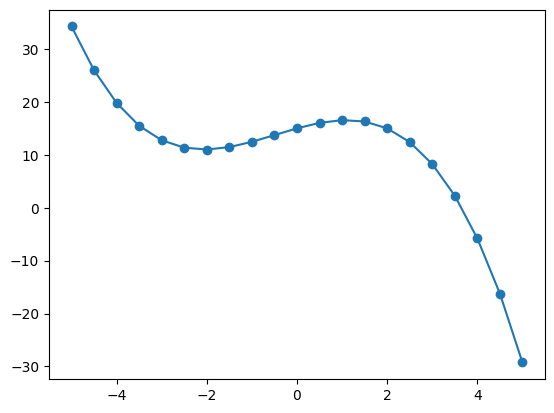

In [46]:
splineLinear = interpolate.interp1d(data0[0], data0[1], kind = "linear")
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear(data0[0]))

zoom

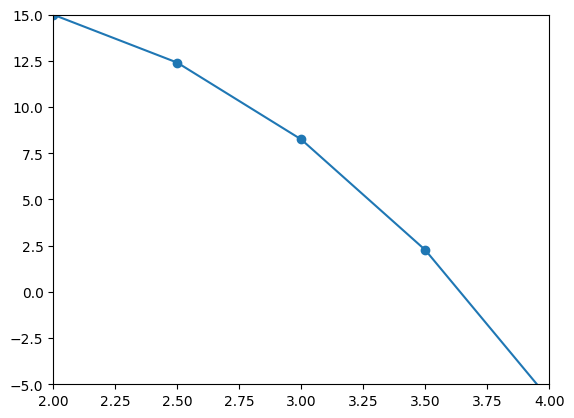

In [47]:
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear(x_list))

Cubic Spline: The Derivatives are usually more continuous

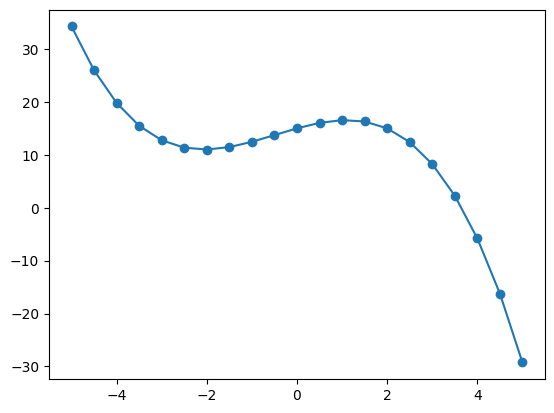

In [48]:
splineCubic = interpolate.interp1d(data0[0], data0[1], kind = 'cubic')
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineCubic(data0[0]))


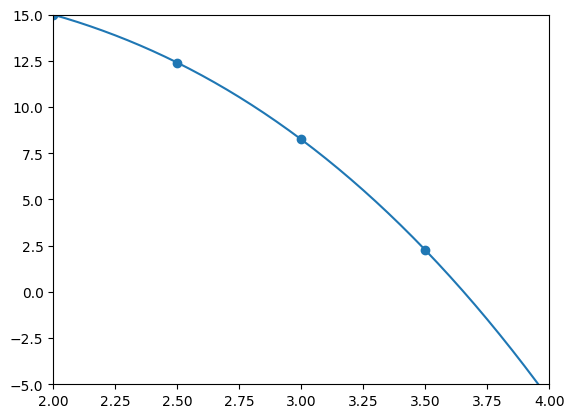

In [49]:
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic(x_list))


### Perturbed data

Handling data that isn't smooth

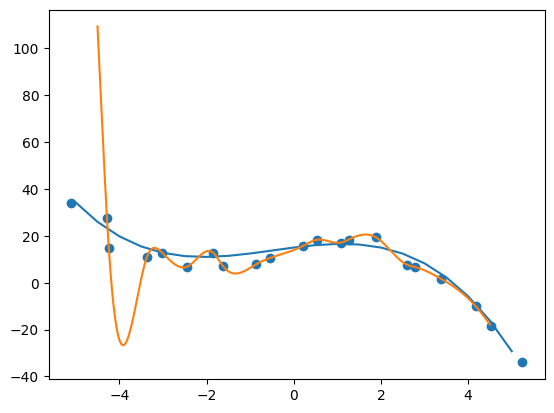

In [50]:
splineCubic = interpolate.interp1d(data[0], data[1], kind = 'cubic')
plt.plot(data0[0], data0[1]) # unperturbed data

x_list = np.linspace(-4.5, 4.5, 901)
plt.scatter(data[0], data[1]) # perturbed data
plt.plot(x_list, splineCubic(x_list)) # line fitting the perturbed data

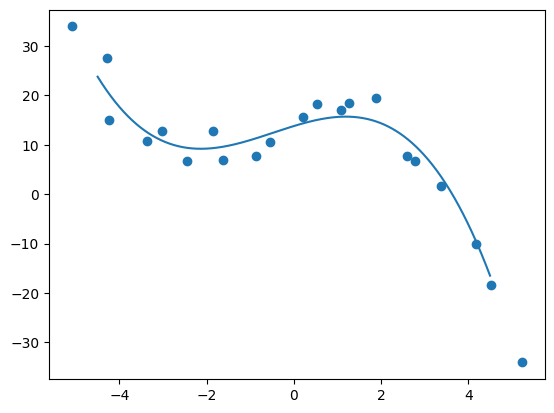

In [51]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(500)
plt.scatter(data[0], data[1])

x_list = np.linspace(-4.5, 4.5, 901)
plt.plot(x_list, splineSmooth(x_list))

## Perfect interpolation using polynomials

In [52]:
# reducing the number of datapoints

datapoly = data[:, 7:14]
datapoly

array([[-1.61568176, -0.86488576, -0.54362669,  0.20814104,  0.537098  ,
         1.09292022,  1.25972179],
       [ 6.91420259,  7.83879037, 10.53807639, 15.65485516, 18.3354208 ,
        17.14393585, 18.41807625]])

In [53]:
x = np.transpose(np.array([datapoly[0,:]**0, datapoly[0,:]**1, datapoly[0,:]**2, datapoly[0,:]**3, datapoly[0,:]**4, datapoly[0,:]**5, datapoly[0,:]**6]))
y = datapoly[1,:]


# To solve this, we can use Gaussian Elimination or Lower- Upper Decomposition...........OR JUST CALL A LIBRARY :)

In [54]:
a = np.linalg.solve(x,y)
a

array([ 13.68271723,   8.58407835,   5.93557684,  -5.47165386,
       -12.67641117,   2.66174659,   4.73431012])

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0,30])

x_list = np.linspace(-2.5, 2.5, 901)
y_list = a[0]*x_list**0 + a[1]*x_list**1 + a[2]*x_list**2 + a[3]*x_list**3 + a[4]*x_list**4 + a[5]*x_list**5 + a[6]*x_list**6
plt.scatter(datapoly[0], datapoly[1])
plt.plot(x_list, y_list)

## Fitting a Model Function

### Define model polynomial function

In [55]:
def modelPolynomial(x, a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * x**k
    return t

In [56]:
a0 = np.array([15, 2.4, -0.5, -0.35])

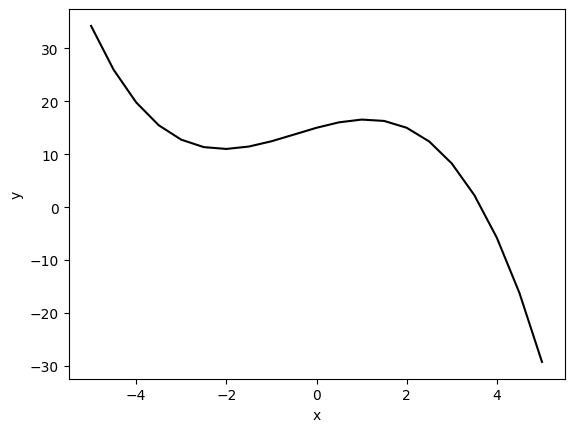

In [57]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-5, 5, npoints)
plt.plot(x_list, modelPolynomial(x_list, a0), 'black')

### Defining Error

In [58]:
def errorFit(f, coeff, data):
    # f: fit function
    # coeff: ai
    # data: the data we try to fit
    error = 0
    for i in range(len(data[0])):
        error = error + (data[1,i]- f(data[0,i], coeff))**2
        #print(error)
    return error
                         

In [59]:
errorFit(modelPolynomial, a0, data)

np.float64(243.62210486480961)

### Updating Coefficients to reduce the error

In [60]:
def errorFitGradient(f, coeff, data):
    # We need a vector and not a single value
   return -2 * np.array([
           np.sum(np.array([(data[1,i] - f(data[0,i], coeff)) * data[0,i]**k for i in range(len(data[0]))]))
       for k in range(len(coeff))])

In [61]:
errorFitGradient(modelPolynomial, a0, data) # This is the gradient of the error function at this particular point

array([   50.26405471,   -86.48153679,   463.4203071 , -1357.76038798])

### Updating the Loop

In [62]:
iterations = 1000000 # we needd quite a few number of iterations
h = 0.00001 # update rate which needs to be smaller than the reciprocal of the coefficients
a = 2*np.random.rand(4)-1 # we need a random vector with 4 components 
for i in range(iterations):
    # We need to go to the OPPOSITE direction of the gradient, hence '-' 
    a = a - h*errorFitGradient(modelPolynomial, a, data)

In [63]:
print(a)
print(a0)

[13.81175979  2.69936128 -0.50103226 -0.35429965]
[15.    2.4  -0.5  -0.35]


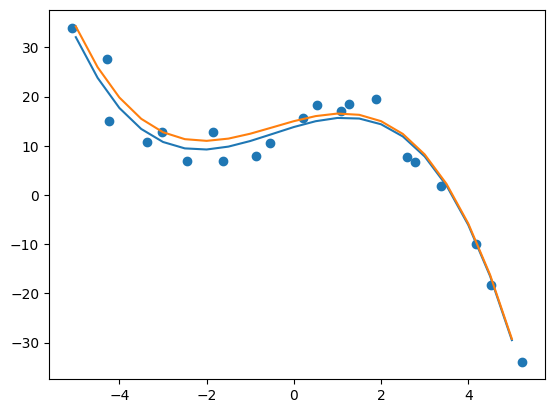

In [66]:
x_list = np.linspace(-5,5,npoints)
plt.plot(x_list, modelPolynomial(x_list, a))
plt.plot(x_list, modelPolynomial(x_list, a0))
plt.scatter(data[0], data[1])